In [2]:
import scipy.io as sio

import numpy as np
import matplotlib.pyplot as plt

from Tools import scale
from Tools import diff
from Tools import ind_VfoldCross
from Tools import SVMclassification
from Tools import plot_confusion_matrix
from Tools import resultsClassification

In [3]:
# Load the data from .mat format:
Image = sio.loadmat('/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/HSI/Pavia.mat')

In [4]:
# Split Data and Labels:
X_total = Image.get('Xtotal')
Y_total = Image.get('Ytotal')

In [5]:
# Reshape the data from data cube to 2-D matrix:
X_total = X_total.reshape((400*400, 40))
Y_total = Y_total.reshape((400*400, 1))

In [6]:
# Scale the data:
X_total, val = scale(X_total)

In [7]:
# Select all the pixels with class(class = 0 is non-classifier):
X = X_total[np.where(Y_total != 0)[0],:]
Y = Y_total[np.where(Y_total != 0)[0]]

CV done!
Training!
Predicting!
0.9801813660962411
Confusion matrix
[[4181    0    0    0    0    0    0    0    0]
 [   0 2195    1    0    0   49    0    0   79]
 [   0    0 2119    7    7    0    0    4    0]
 [   0    0    2 1534   12    0    4   41    6]
 [   0    0    1    4 1335   15    2   18    0]
 [   0   11    0    0    3 1131    0    0    0]
 [   0    0    0    2    0    0  583    0    0]
 [   0    0    0    0    2    0    1  184    0]
 [   0    0    0    0    0    0    0    0  141]]


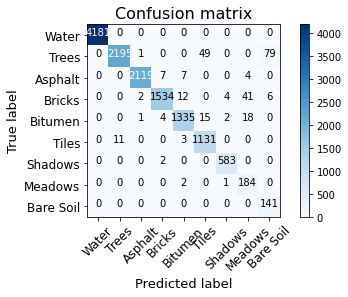

In [8]:
# Select random the training samples per class: (we have to balance the classes)
list_of_train = ind_VfoldCross(Y, 100)

# Select training and testing data:
X_train = X[list_of_train,:]
Y_train = Y[list_of_train]
Y_train = [Y_train[t][0] for t in range(0,len(Y_train))]
Y_train = np.array(Y_train)


list_of_test = diff(range(len(X)), list_of_train)
X_test = X[list_of_test,:]
Y_test = Y[list_of_test]
Y_test = [Y_test[t][0] for t in range(0,len(Y_test))]
Y_test = np.array(Y_test)


# Apply SVM using cross-validation to tune (fix) the parameters:
target_names = ['Water', 'Trees', 'Asphalt', 'Bricks', 'Bitumen', 'Tiles', 'Shadows', 'Meadows', 'Bare Soil']
RES = SVMclassification(X_train, Y_train, X_test, Y_test,target_names, 5)
print(RES[1])

# Plot the confusion matrix:
## Check the changes here..
fig = plt.figure(1)
plot_confusion_matrix(RES[3], 
                      target_names, 
                      normalize = False, 
                      title = 'Confusion matrix', 
                      cmap = plt.cm.Blues)

In [9]:
# Uncomment if you want to save the figure
fig.savefig('Pavia_SVM_confusion.jpg', format = 'jpg', dpi = 150)
plt.close('all')

In [10]:
# Save the results and the classifier:
Rootoutput = '.'
resultsClassification(RES, 
                      Rootoutput, 
                      '', 
                      'ResultsSVM',
                      target_names, 
                      X_train.shape[1], -1, -1)

saved cl_Final


/tmp/ipykernel_265/3115979438.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Non-class'] + target_names)


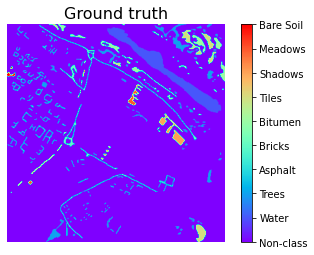

/tmp/ipykernel_265/3115979438.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(target_names)


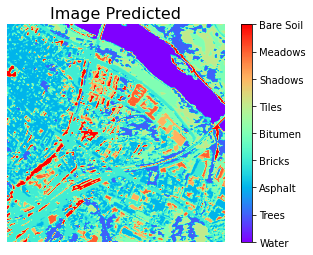

/tmp/ipykernel_265/3115979438.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['Non-class'] + target_names)


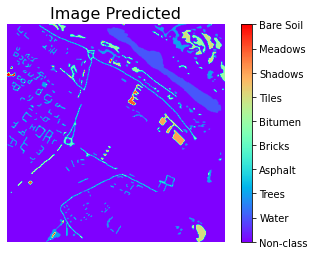

In [11]:
# Classify all the image:
Y_pred = RES[0].predict(X_total)

# Ground truth and classification maps visualization:
Y_total = Y_total.reshape((400,400))
img = plt.imshow(Y_total)
img.set_cmap('rainbow')
plt.title('Ground truth',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Non-class'] + target_names)
plt.axis('off')
plt.show()

Y_pred = Y_pred.reshape((400,400))
img = plt.imshow(Y_pred)
img.set_cmap('rainbow')
plt.title('Image Predicted',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(target_names)
plt.axis('off')
plt.show()

Y_pred[Y_total == 0] = 0
Y_pred = Y_pred.reshape((400,400))
img = plt.imshow(Y_pred)
img.set_cmap('rainbow')
plt.title('Image Predicted',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(['Non-class'] + target_names)
plt.axis('off')
plt.show()